In [1]:
import pandas as pd

df = pd.read_csv("../../../data/tienda_ventas.csv", index_col=0)
df = df.dropna()
df

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,2013-01-01,1,BABY CARE,0.00000,0
2,2013-01-01,1,BEAUTY,0.00000,0
3,2013-01-01,1,BEVERAGES,0.00000,0
4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2016-04-30,9,PRODUCE,2012.72700,1


In [3]:
import pandas as pd

df = pd.read_csv("../../../data/tienda_ventas.csv", index_col=0)
df = df.dropna()
df['periodo'] = df['date'].apply(lambda x: x[:7])
df

,date,store_nbr,family,sales,onpromotion,periodo
id,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../../data/tienda_ventas.csv", index_col=0)
df = df.dropna()
df["periodo"] = df["date"].apply(lambda x: x[:7])
df

tiendas_agrupadas = (
    df[
        (df["family"] == "BEVERAGES")
        & (df["store_nbr"].isin([3, 44, 45, 46, 47, 48, 49, 50]))
    ]
    .groupby(["periodo", "store_nbr"])
    .agg({"sales": 'sum'})
)
tiendas_agrupadas

pivote = tiendas_agrupadas.unstack().droplevel(0, axis=1).transpose()  # type: ignore
pivote

periodo,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
store_nbr,,,,,,,,,,,,,,,,,,,,,
3,105918.0,85944.0,110295.0,106450.0,104911.0,112178.0,101377.0,104993.0,115380.0,108865.0,...,248500.0,265434.0,290952.0,269803.0,260578.0,268735.0,276910.0,236641.0,251808.0,280338.0
44,134704.0,113249.0,141401.0,132401.0,129241.0,129758.0,116986.0,121577.0,134477.0,124148.0,...,269845.0,306903.0,335873.0,314323.0,294712.0,296869.0,308109.0,267233.0,282438.0,362065.0
45,95337.0,79642.0,103195.0,93776.0,93967.0,98994.0,86512.0,84388.0,94465.0,91376.0,...,239451.0,262088.0,269589.0,260236.0,270859.0,283491.0,285231.0,245660.0,255179.0,288155.0
46,66554.0,59986.0,74332.0,67487.0,68509.0,72126.0,63354.0,63395.0,74183.0,69787.0,...,173738.0,167830.0,189224.0,185181.0,185342.0,187011.0,185721.0,158185.0,166592.0,189725.0
47,86696.0,73934.0,94119.0,89860.0,92172.0,93244.0,76571.0,82500.0,98871.0,96628.0,...,226837.0,230120.0,269208.0,262587.0,252977.0,259226.0,264246.0,228110.0,238909.0,260209.0
48,46841.0,42221.0,54260.0,51336.0,49745.0,52146.0,45959.0,45772.0,55803.0,52305.0,...,136955.0,135547.0,154254.0,152713.0,146434.0,151458.0,152393.0,130522.0,137661.0,153519.0
49,63143.0,50398.0,67747.0,65548.0,66557.0,67011.0,58675.0,60753.0,73595.0,71828.0,...,193790.0,217076.0,256245.0,223401.0,213862.0,227158.0,220034.0,196393.0,209358.0,232772.0
50,42192.0,42662.0,46639.0,44828.0,46304.0,43228.0,41091.0,40785.0,44393.0,47299.0,...,114781.0,118580.0,120880.0,122375.0,123439.0,128996.0,126273.0,111851.0,112656.0,124670.0


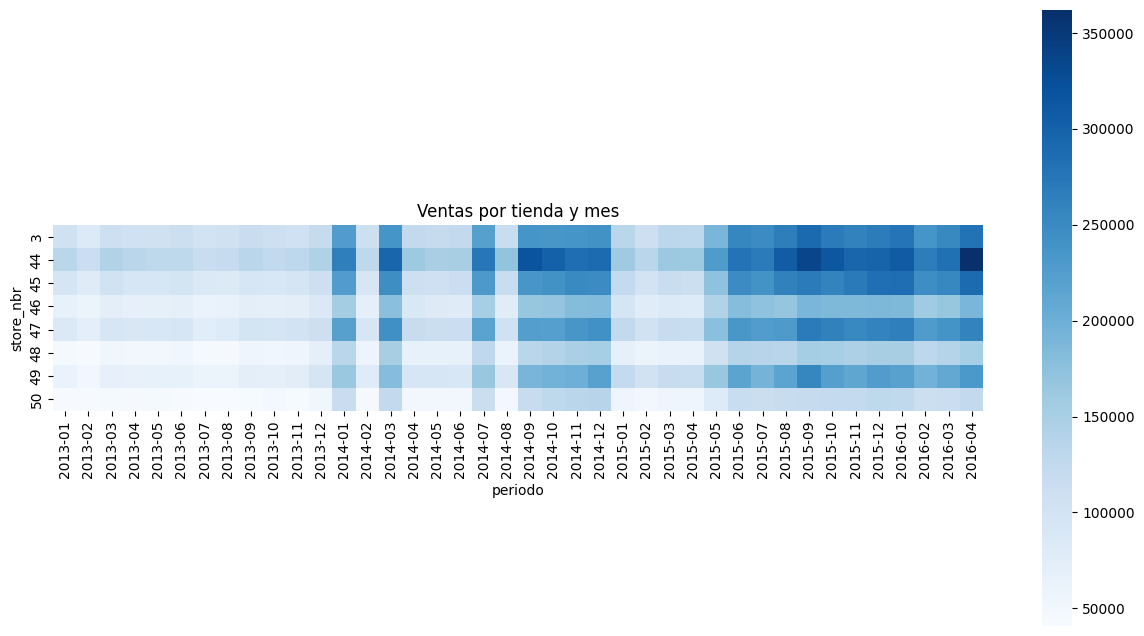

In [10]:
import pandas as pd


df = pd.read_csv("../../../data/tienda_ventas.csv", index_col=0)
df = df.dropna()
df["periodo"] = df["date"].apply(lambda x: x[:7])
df

tiendas_agrupadas = (
    df[
        (df["family"] == "BEVERAGES")
        & (df["store_nbr"].isin([3, 44, 45, 46, 47, 48, 49, 50]))
    ]
    .groupby(["periodo", "store_nbr"])
    .agg({"sales": 'sum'})
)
tiendas_agrupadas

pivote = tiendas_agrupadas.unstack().droplevel(0, axis=1).transpose()  # type: ignore
pivote

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(pivote, cmap="Blues",square=True)
plt.title("Ventas por tienda y mes")

plt.show()

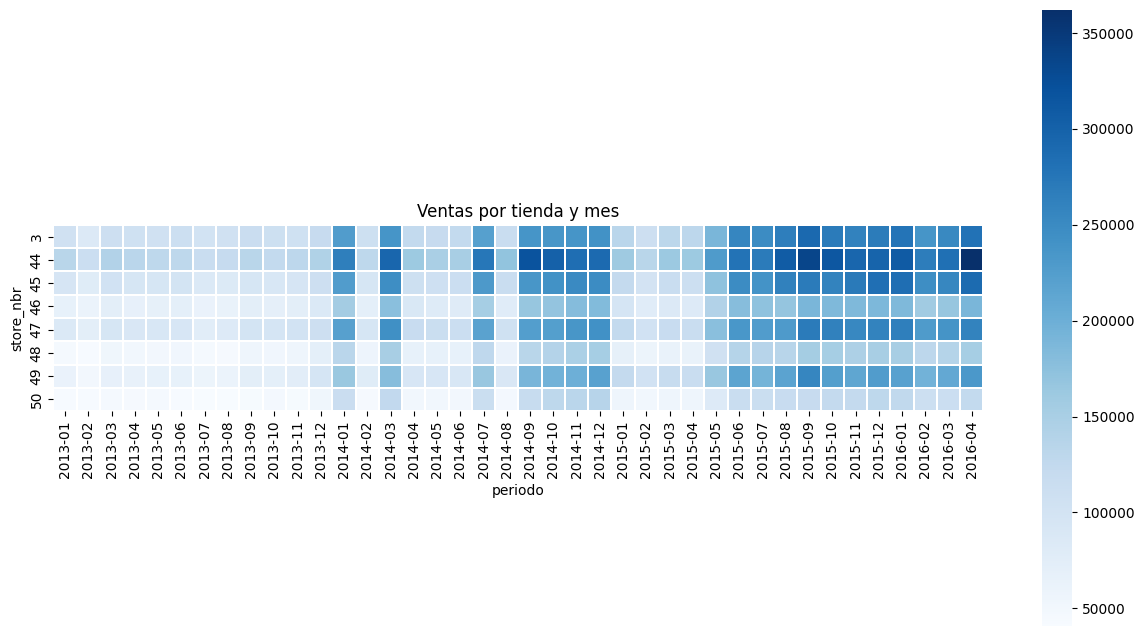

In [11]:
import pandas as pd


df = pd.read_csv("../../../data/tienda_ventas.csv", index_col=0)
df = df.dropna()
df["periodo"] = df["date"].apply(lambda x: x[:7])
df

tiendas_agrupadas = (
    df[
        (df["family"] == "BEVERAGES")
        & (df["store_nbr"].isin([3, 44, 45, 46, 47, 48, 49, 50]))
    ]
    .groupby(["periodo", "store_nbr"])
    .agg({"sales": 'sum'})
)
tiendas_agrupadas

pivote = tiendas_agrupadas.unstack().droplevel(0, axis=1).transpose()  # type: ignore
pivote

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(pivote, cmap="Blues",square=True, linewidths=0.1)
plt.title("Ventas por tienda y mes")

plt.show()